In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def carregar_imagem():
    img = cv.imread("../src/tennisball.jpg")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)
    return img

def mostrar_imagem(img, titulo):
    plt.imshow(img)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def contornos(img, mask):
    contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    img = cv.drawContours(img, contours, -1, (255, 0, 0), 2)
    return img

def draw_bounding_box(img, contour, color=(0, 0, 255), thickness=2):
    x, y, w, h = cv.boundingRect(contour)
    points = np.array([
        [x, y],
        [x + w, y],
        [x + w, y + h],
        [x, y + h]
    ], np.int32)
    cv.polylines(img, [points], True, color, thickness)

def draw_rotated_bounding_box(img, contour):
    rect = cv.minAreaRect(contour)
    box = cv.boxPoints(rect)
    box = np.intp(box)
    cv.drawContours(img, [box], 0, (0, 0, 255), 2)

def draw_min_enclosing_circle(img, contour):
    (x, y), radius = cv.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv.circle(img, center, radius, (0, 0, 255), 2)

def draw_ellipse(img, contour):
    ellipse = cv.fitEllipse(contour)
    cv.ellipse(img,ellipse,(0, 0, 255), 2)

In [3]:
img = carregar_imagem()

# Função para criar uma janela de trackbars
def empty(a):
    pass

# +==+==+==+==+==+ Color Detection +==+==+==+==+==+ //
hMin = 0
sMin = 0
vMin = 0
hMax = 179
sMax = 255
vMax = 255

# Converte a imagem para o espaço de cor HSV
imgHSV = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# Cria a janela com trackbars
cv.namedWindow("Trackbars", cv.WINDOW_NORMAL)
cv.createTrackbar("Hue Min", "Trackbars", hMin, 179, empty)
cv.createTrackbar("Hue Max", "Trackbars", hMax, 179, empty)
cv.createTrackbar("Sat Min", "Trackbars", sMin, 255, empty)
cv.createTrackbar("Sat Max", "Trackbars", sMax, 255, empty)
cv.createTrackbar("Val Min", "Trackbars", vMin, 255, empty)
cv.createTrackbar("Val Max", "Trackbars", vMax, 255, empty)

while True:
    # Atualiza os valores dos trackbars
    hMin = cv.getTrackbarPos("Hue Min", "Trackbars")
    hMax = cv.getTrackbarPos("Hue Max", "Trackbars")
    sMin = cv.getTrackbarPos("Sat Min", "Trackbars")
    sMax = cv.getTrackbarPos("Sat Max", "Trackbars")
    vMin = cv.getTrackbarPos("Val Min", "Trackbars")
    vMax = cv.getTrackbarPos("Val Max", "Trackbars")

    # Define os limites inferior e superior da máscara
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Cria a máscara que destaca as cores dentro do intervalo definido
    mask = cv.inRange(imgHSV, lower, upper)

    # Mostra as imagens: original, HSV e a máscara
    cv.imshow("Image", img)
    cv.imshow("Image HSV", imgHSV)
    cv.imshow("Image Mask", mask)

    # Saída do loop com tecla 'q'
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Fecha as janelas
cv.destroyAllWindows()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kaio/.local/lib/python3.10/site-packages/cv2/qt/plugins"


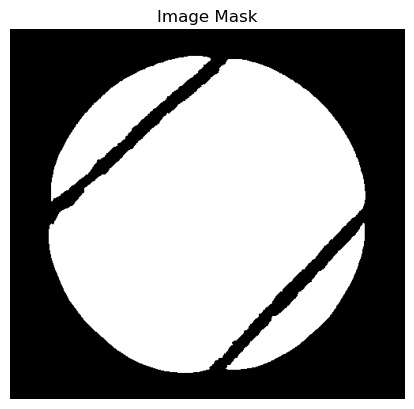

In [89]:
lower = np.array([32, 71, 0])
upper = np.array([179, 255, 255])
mask = cv.inRange(imgHSV, lower, upper)


plt.imshow(mask, cmap='gray')
plt.title('Image Mask')
plt.axis('off')
plt.show()

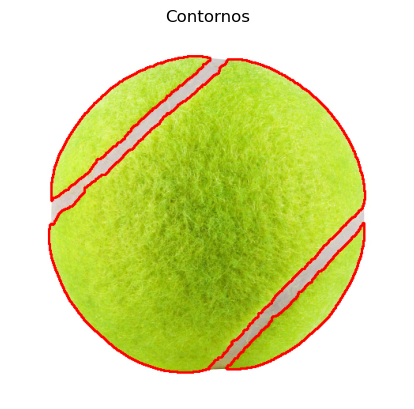

In [90]:
contours, hierarchy = cv.findContours(mask,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_contours = cv.drawContours(img, contours, -1, (255, 0, 0), 2)

mostrar_imagem(img_contours, 'Contornos')

In [91]:
def draw_bounding_box(img, contour, color=(0, 0, 255), thickness=2):
    x, y, w, h = cv.boundingRect(contour)
    points = np.array([
        [x, y],
        [x + w, y],
        [x + w, y + h],
        [x, y + h]
    ], np.int32)
    cv.polylines(img, [points], True, color, thickness)

# Questão 1

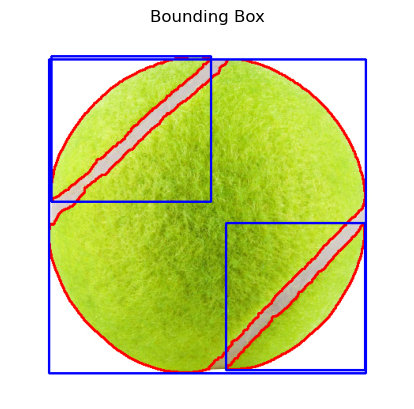

In [92]:
img = carregar_imagem()
img = contornos(img, mask)

for contour in contours:
    draw_bounding_box(img, contour)

mostrar_imagem(img, 'Bounding Box')

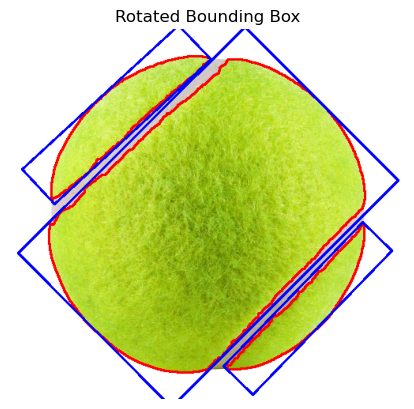

In [95]:
img = carregar_imagem()
img = contornos(img, mask)

for contour in contours:
    draw_bounding_box(img, contour)

mostrar_imagem(img, 'Rotated Bounding Box')

# Questão 2

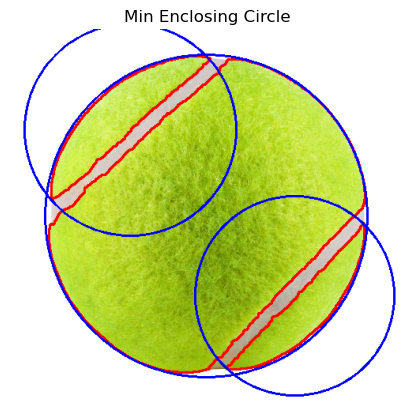

In [105]:
img = carregar_imagem()
img = contornos(img, mask)

for contour in contours:
    draw_min_enclosing_circle(img, contour)

mostrar_imagem(img, 'Min Enclosing Circle')

# Questão 3

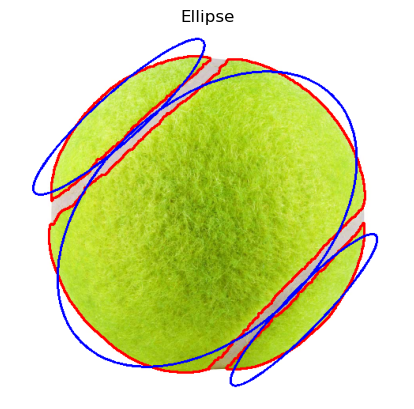

In [107]:
img = carregar_imagem()
img = contornos(img, mask)

for contour in contours:
    draw_ellipse(img, contour)

mostrar_imagem(img, 'Ellipse')

# Questão 4

In [81]:
x, y, w, h = cv.boundingRect(contours[1])
aspect_ratio = float(w) / h

area_rect = w * h

area_contour = cv.contourArea(contours[1])
extent = area_contour / area_rect

hull = cv.convexHull(contours[1])
area_hull = cv.contourArea(hull)
solidity = area_contour / area_hull

equi_diameter = np.sqrt(4 * area_contour / np.pi)

if len(contours[1]) >= 5:  # FitEllipse requires at least 5 points
    ellipse = cv.fitEllipse(contours[1])
    orientation = ellipse[2]

print(f'Proporção: {aspect_ratio}')
print(f'Área do Retângulo Limite: {area_rect}')
print(f'Extensão: {extent}')
print(f'Solidez: {solidity}')
print(f'Diâmetro Equivalente: {equi_diameter}')
print(f'Orientação: {orientation if len(contours[1]) >= 5 else "Não disponível"}')

Proporção: 1.0100755667506298
Área do Retângulo Limite: 159197
Extensão: 0.6154701407689843
Solidez: 0.9837202881453779
Diâmetro Equivalente: 353.204308910149
Orientação: 46.09839630126953


# Questão 5

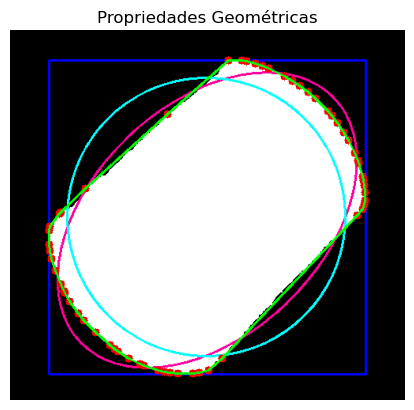

In [108]:
img = carregar_imagem()

mask = np.zeros_like(img)
img_5 = cv.drawContours(mask, [contours[1]], -1, (255, 255, 255), thickness=cv.FILLED)

ellipse = cv.fitEllipse(contours[1])
img_5 = cv.ellipse(img_5, ellipse,(255, 0, 157), 2)

area_contour = cv.contourArea(contours[1])
equiv_diameter = np.sqrt(4 * area_contour / np.pi)
(x, y), radius = cv.minEnclosingCircle(contours[1])
center = (int(x), int(y))
img_5 = cv.circle(img_5, center, int(equiv_diameter / 2), (0, 255, 255), 2)

x, y, w, h = cv.boundingRect(contours[1])
img_5 = cv.rectangle(img_5, (x, y), (x + w, y + h), (0, 0, 255), 2)

hull = cv.convexHull(contours[1])
for point in hull:
    img_5 = cv.circle(img_5, tuple(point[0]), 5, (255, 0, 0), -1)

cv.polylines(img_5, [hull], isClosed=True, color=(0, 255, 0), thickness=2)

mostrar_imagem(img_5, 'Propriedades Geométricas')